# Kalman Filter

<u>**Predict**</u>

$\begin{array}{|l|l|l|}
\hline
\text{Univariate} & \text{Univariate} & \text{Multivariate}\\
& \text{(Kalman form)} & \\
\hline
\bar \mu = \mu + \mu_{f_x} & \bar x = x + dx & \bar{\mathbf x} = \mathbf{Fx} + \mathbf{Bu}\\
\bar\sigma^2 = \sigma_x^2 + \sigma_{f_x}^2 & \bar P = P + Q & \bar{\mathbf P} = \mathbf{FPF}^\mathsf T + \mathbf Q \\
\hline
\end{array}$

<u>**Update**</u>

$\begin{array}{|l|l|l|}
\hline
\text{Univariate} & \text{Univariate} & \text{Multivariate}\\
& \text{(Kalman form)} & \\
\hline
& y = z - \bar x & \mathbf y = \mathbf z - \mathbf{H\bar x} \\
& K = \frac{\bar P}{\bar P+R}&
\mathbf K = \mathbf{\bar{P}H}^\mathsf T (\mathbf{H\bar{P}H}^\mathsf T + \mathbf R)^{-1} \\
\mu=\frac{\bar\sigma^2\, \mu_z + \sigma_z^2 \, \bar\mu} {\bar\sigma^2 + \sigma_z^2} & x = \bar x + Ky & \mathbf x = \bar{\mathbf x} + \mathbf{Ky} \\
\sigma^2 = \frac{\sigma_1^2\sigma_2^2}{\sigma_1^2+\sigma_2^2} & P = (1-K)\bar P &
\mathbf P = (\mathbf I - \mathbf{KH})\mathbf{\bar{P}} \\
\hline
\end{array}$

## Import Dependencies

In [1]:
import numpy as np
from numpy.random import randn
import math

import plotly as py
import plotly.express as px
from plotly import graph_objects as go

from filterpy import kalman as kf
from filterpy.common import Q_discrete_white_noise

## Multivariate Kalman Filters
https://nbviewer.org/github/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/06-Multivariate-Kalman-Filters.ipynb

In [4]:
dt = 1.
z_var = 4.   # Sensor variance 
p_var = 2.   # Process variance

In [21]:
x0 = np.array([.0, 1.])  # initial state position and velocity (as mean of normal distr.)
P0 = np.diag([500., 49.]) # initial state covariance, (velocity <= 21m/s: 3σ=21 -> σ²=49)

Q = Q_discrete_white_noise(dim=2, dt=dt, var=p_var) # process covariance (white noise for movement)
H = np.array([[1., 0.]])   # measurement function, H [x, v] = x
R = np.array([[z_var]])     # measurement variance

### Implement the Kalman Filter

In [22]:
def pos_vel_filter_1D(x, P, R, Q=0, dt=dt):
    """ Returns a KalmanFilter which implements a
    constant velocity model for a state [x dx].T
    """ 
    f = kf.KalmanFilter(dim_x=2, dim_z=1)
    f.x = np.array([x[0], x[1]])
    f.F = np.array([[1., dt],
                    [0., 1.]])
    f.H = np.array([[1., 0]])
    f.R *= R
    if np.isscalar(P):
        f.P *= P
    else:
        f.P = P[:]         # [:] makes deep copy
    if np.isscalar(Q):
        f.Q = Q_discrete_white_noise(dim=2, dt=dt, var=Q)
    else:
        f.Q = Q[:]
    return f


    

In [67]:
def pos_vel_acc_filter_1D(x, P, R, Q=0, dt=dt):
    """ Returns a KalmanFilter which implements a
    constant velocity model for a state [x dx].T
    """ 
    f = kf.KalmanFilter(dim_x=3, dim_z=1)
    f.x = np.array([x[0], x[1], x[2]])
    f.F = np.array([[1., 0*dt, .05 * dt**2],
                    [0,   1,     dt],
                    [0, 0, 1]])
    f.H = np.array([[1., 0, 0]])
    f.R *= R
    if np.isscalar(P):
        f.P *= P
    else:
        f.P = P[:]         # [:] makes deep copy
    #if np.isscalar(Q):
    #    f.Q = Q_discrete_white_noise(dim=2, dt=dt, var=Q)
    #else:
    #    f.Q = Q[:]
    return f


    

In [9]:
f = pos_vel_filter(x=x0, P=P0, R=R, Q=Q, dt=dt)
xs_act, zs = compute_dog_data(z_var=z_var, process_var=p_var, count=20, dt=dt)
f

KalmanFilter object
dim_x = 2
dim_z = 1
dim_u = 0
x = [0. 1.]
P = [[500.   0.]
     [  0.  49.]]
x_prior = [[0. 0.]].T
P_prior = [[1. 0.]
           [0. 1.]]
x_post = [[0. 0.]].T
P_post = [[1. 0.]
          [0. 1.]]
F = [[1. 1.]
     [0. 1.]]
Q = [[0.5 1. ]
     [1.  2. ]]
R = [[4.]]
H = [[1. 0.]]
K = [[0. 0.]].T
y = [[0.]]
S = [[0.]]
SI = [[0.]]
M = [[0.]]
B = None
z = [[None]]
log-likelihood = -708.3964185322641
likelihood = 2.2250738585072014e-308
mahalanobis = 0.0
alpha = 1.0
inv = <function inv at 0x7f21547fc310>

In [10]:
xs=[]
covs=[]
for z in zs:
    f.predict()
    f.update(z)
    xs.append(f.x)
    covs.append(f.P)
xs = np.array(xs)
covs = np.array(covs)

In [37]:
px.line(y=[xs_act, zs, xs[:,0]])

NameError: name 'xs_act' is not defined

In [84]:
xs_act.shape

(20,)

In [68]:
x0 = [1., 0., 0]
P0 = np.diag([1, 1, 1])

In [69]:
f = pos_vel_acc_filter_1D(x=x0, P=P0, R=R, Q=Q, dt=dt)

In [70]:
f

KalmanFilter object
dim_x = 3
dim_z = 1
dim_u = 0
x = [1. 0. 0.]
P = [[1 0 0]
     [0 1 0]
     [0 0 1]]
x_prior = [[0. 0. 0.]].T
P_prior = [[1. 0. 0.]
           [0. 1. 0.]
           [0. 0. 1.]]
x_post = [[0. 0. 0.]].T
P_post = [[1. 0. 0.]
          [0. 1. 0.]
          [0. 0. 1.]]
F = [[1.   0.   0.05]
     [0.   1.   1.  ]
     [0.   0.   1.  ]]
Q = [[1. 0. 0.]
     [0. 1. 0.]
     [0. 0. 1.]]
R = [[4.]]
H = [[1. 0. 0.]]
K = [[0. 0. 0.]].T
y = [[0.]]
S = [[0.]]
SI = [[0.]]
M = [[0.]]
B = None
z = [[None]]
log-likelihood = -708.3964185322641
likelihood = 2.2250738585072014e-308
mahalanobis = 0.0
alpha = 1.0
inv = <function inv at 0x7fc6b42e6310>

In [71]:
xs=[]
covs=[]
for _ in range(100):
    f.predict()
    f.update([f.x[0]])
    xs.append(f.x)
    covs.append(f.P)
xs = np.array(xs)
covs = np.array(covs)

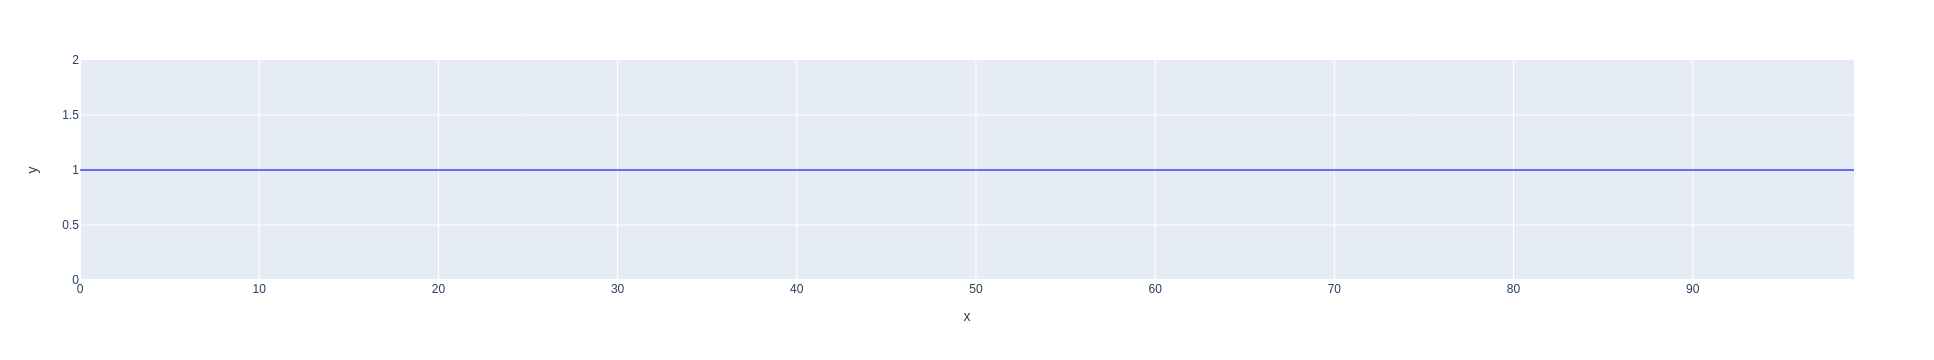

In [72]:
px.line(y=xs[:,0])

In [54]:
f.x

array([5.e+03, 1.e+02, 1.e+00])

In [51]:
def oscillator_filter(x0, dt):
    f = kf.KalmanFilter(dim_x=3, dim_z=1)
    f.x = np.array([x0[0], x0[1], x0[2]])
    f.F = np.array([[1., dt, .05 * dt**2],
                    [0,   1,     dt],
                    [-0.1, 0.1, 0]])
    
    f.H = np.array([[1., 0, 0]])
    return f

In [52]:
f = oscillator_filter([50., -1, 1], 1)

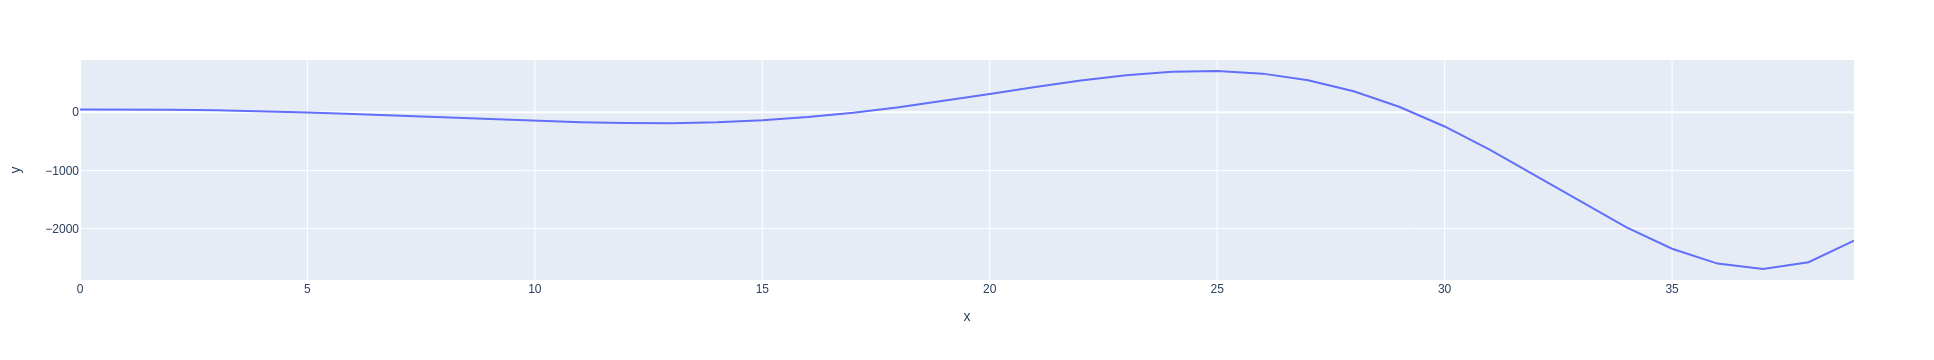

In [53]:
xs=[]
covs=[]
for _ in range(40):
    f.predict()
    f.update([f.x[0]])
    xs.append(f.x)
    covs.append(f.P)
xs = np.array(xs)
covs = np.array(covs)
px.line(y=xs[:,0])

In [ ]:
f